# <center> MNist database classification<br> <small>Réda DEHAK<br> 1 July 2020</small> </center>

The goal of this lab is :
    - Evaluate your understanding of the course
    - Try and make a comparison of different machine learning methods
    
This study is based on the <A href=http://yann.lecun.com/exdb/mnist/>MNist dataset</A>. It is handwritten digits dataset with a training set of 60000 samples, and a test set of 10000 samples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

## Questions:

- propose three different approaches to classify the MNist dataset. Compare the performance of each method and suggest solutions to improve the performance of each one. You can use all methods that you learned or not during the MSc. The goal is to obtain the best performances measure.
- Make a video of 5 minutes maximum to justify your choices and explain your results.
- Download the notebook and video on Teams before July 21th.

### Load the dataset
- MNist dataset is proposed in keras.datasets toolbox, you can use this code to load the dataset or use the function mnist_load_data provided in mnist.py file

In [134]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

###### The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students.
###### x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.

In [135]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

###### We visualize a sample from the dataset

8


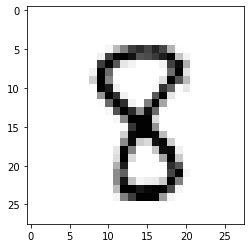

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 50001 # Range can vary from 0 to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

## First Method:

### Random Forest Classifier

In [137]:
import pandas as pd
import numpy as np

In [138]:
#Importing the classifier module from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

###### As, the sklearn classifier doesnot work with more than 2-dimensional array, we reshape the array to  2-D array so it works on the classifier.

In [139]:
Xtrain = x_train.reshape(60000, 784)
Xtest = x_test.reshape(10000, 784)


Xtrain.shape

(60000, 784)

In [142]:
#Normalizing the values
Xtrain =Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
Xtrain /= 255
Xtest /= 255

###### Modellling and Fitting our Classifier

In [143]:
RFC_clf = RandomForestClassifier(n_estimators=100)

RFC_clf.fit(Xtrain, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### Testing and evaluating the accuracy of the model

In [144]:
predicted = RFC_clf.predict(Xtest)

RFC_acc = accuracy_score(y_test,predicted)

print("Accuracy: ", RFC_acc)

Accuracy:  0.9698


#### Thus, the Random Forest Classifier had an accuracy of 0.9698 or 96.98%
#### The algorithm can be further optimized by adjusting the hyperparameters such as increasing the number of predictors or by using cross-validation methods such as RandomizedSearchCV.

## Second Method:
### Simple Neural Network

We can use the Xtrain,y_train,Xtest and y_test previously computed for Simple Neural Network. 

#### Importing modules and Pre-processing

In [149]:
import keras
#Importing the necessary Keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [150]:
# Parameters for the model
batch_size=128
#output classes - 10 in this case
num_classes=10
epochs =12

In [151]:
print(Xtrain.shape[0], 'train samples')
print(Xtest.shape[0], 'test samples')

60000 train samples
10000 test samples


In [152]:
# convert class vectors to binary class matrices 
ytrain = keras.utils.to_categorical(y_train, num_classes)
ytest = keras.utils.to_categorical(y_test, num_classes)


#### Building the Model

In [153]:
### Build Model
SNN_model = Sequential()
SNN_model.add(Dense(512, activation='relu', input_shape=(784,)))
SNN_model.add(Dropout(0.2))
SNN_model.add(Dense(512, activation='relu'))
SNN_model.add(Dropout(0.2))
SNN_model.add(Dense(num_classes, activation='softmax'))

###### Dropout layer is used to counter overfitting(regularization).
###### Dense layers define the output size. The first and second dense layer can have any value but the last dense layer should match with the output labels i.e., 10.
###### Activation function is Rectified Linear Unit (ReLU), and Softmax.

#### Compiling and Fitting the Model:

In [154]:
#Compile Model
SNN_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Run Model - save metrics after each epoch in history
history = SNN_model.fit(Xtrain, y_train,epochs=epochs,batch_size=batch_size,verbose=2)


Train on 60000 samples
Epoch 1/12
60000/60000 - 5s - loss: 0.8426 - accuracy: 0.7369
Epoch 2/12
60000/60000 - 4s - loss: 0.3577 - accuracy: 0.8937
Epoch 3/12
60000/60000 - 4s - loss: 0.2797 - accuracy: 0.9171
Epoch 4/12
60000/60000 - 5s - loss: 0.2315 - accuracy: 0.9306
Epoch 5/12
60000/60000 - 5s - loss: 0.1921 - accuracy: 0.9417
Epoch 6/12
60000/60000 - 5s - loss: 0.1649 - accuracy: 0.9503
Epoch 7/12
60000/60000 - 5s - loss: 0.1439 - accuracy: 0.9566
Epoch 8/12
60000/60000 - 5s - loss: 0.1253 - accuracy: 0.9627
Epoch 9/12
60000/60000 - 5s - loss: 0.1137 - accuracy: 0.9657
Epoch 10/12
60000/60000 - 5s - loss: 0.1030 - accuracy: 0.9688
Epoch 11/12
60000/60000 - 5s - loss: 0.0935 - accuracy: 0.9722
Epoch 12/12
60000/60000 - 6s - loss: 0.0853 - accuracy: 0.9734


#### Evaluating the Model on Test data:

In [155]:
#Score model against test data
SNN_score = SNN_model.evaluate(Xtest, y_test, verbose=0)
print('Test loss:', SNN_score[0])
print('Test accuracy:', SNN_score[1])

Test loss: 0.08903875903887674
Test accuracy: 0.9735


#### Thus, the testing on the test set yielded an accuracy of 0.9735 or 97.35%
#### However, there is still room for improvement by adjusting hyperparameters such as learning rate, batch_size, increasing hidden layers etc.,

8


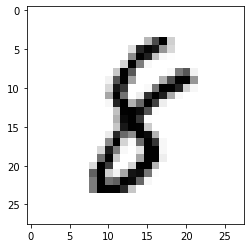

In [156]:
image_index = 9900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
SNN_pred = SNN_model.predict(Xtest[image_index].reshape(1,784))
print(SNN_pred.argmax())

## Third Method:
### Convolutional Neural Networks
To be able to use the dataset in Keras API, we need 4-dims numpy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models.

#### Reshaping the array to 4-dims so that it can work with the Keras API

In [157]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
# Making sure that the values are float so that we can get decimal points after division
x_train =x_train.astype('float32')
x_test = x_test.astype('float32')

#### Normalizing the RGB codes by dividing it to the max RGB value.

In [158]:
x_train /= 255
x_test /=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


#### Building the Model

In [159]:
#Importing the necessary Keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [162]:
#Creating the Sequential Model with the imported layers
CNN_model= Sequential()
CNN_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
CNN_model.add(Conv2D(64, (3,3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(10, activation='softmax'))


###### I have used kernel_size of 3X3 i.e, a matrix of 3X3 dimenstions as convolution matrix.
###### MaxPooling2D is used to extract the most prominent features from a 2D image.
###### Flatten is used for flattening the 2D arrays for fully connected layers.
###### Dropout layer is used to counter overfitting(regularization).
###### Dense layers define the output size. The first dense layer can have any value but the last dense layer should match with the output labels i.e., 10.
###### Activation function is Rectified Linear Unit (ReLU).


#### Compiling and Fitting the Model

In [163]:
CNN_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
CNN_model.fit(x=x_train,y=y_train, epochs=epochs,verbose = 2)

Train on 60000 samples
Epoch 1/12
60000/60000 - 185s - loss: 0.1423 - accuracy: 0.9561
Epoch 2/12
60000/60000 - 185s - loss: 0.0559 - accuracy: 0.9829
Epoch 3/12
60000/60000 - 189s - loss: 0.0395 - accuracy: 0.9876
Epoch 4/12
60000/60000 - 188s - loss: 0.0320 - accuracy: 0.9897
Epoch 5/12
60000/60000 - 183s - loss: 0.0237 - accuracy: 0.9929
Epoch 6/12
60000/60000 - 183s - loss: 0.0211 - accuracy: 0.9933
Epoch 7/12
60000/60000 - 180s - loss: 0.0166 - accuracy: 0.9945
Epoch 8/12
60000/60000 - 180s - loss: 0.0157 - accuracy: 0.9946
Epoch 9/12
60000/60000 - 184s - loss: 0.0132 - accuracy: 0.9957
Epoch 10/12
60000/60000 - 189s - loss: 0.0124 - accuracy: 0.9957
Epoch 11/12
60000/60000 - 185s - loss: 0.0110 - accuracy: 0.9964
Epoch 12/12
60000/60000 - 194s - loss: 0.0123 - accuracy: 0.9959


###### Thus, the model had 0.9959 or 99.59% accuracy on the train set.
###### Now, we test the model on the test set.

In [164]:
#Evaluating the loss and accuracy of the model
test_loss, CNN_test_acc = CNN_model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', CNN_test_acc)


10000/10000 - 4s - loss: 0.0340 - accuracy: 0.9923

Test accuracy: 0.9923


###### Thus, the model has 0.9923 or 99.23% accuracy on the test set, which is impressive.
#### If we want to further ameliorate the model, we can play around with hyperparameters such as learning rate, epochs, hidden layers, optmizers etc.,

9


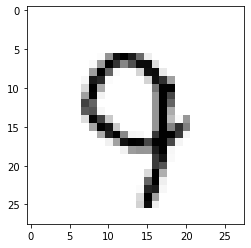

In [166]:
image_index = 999
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = CNN_model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

## Comparison

#### Comparing the three accuracy scores of Random Forest Classfier, Simple Neural Network and Convulated Neural Network:

In [169]:
print(' Random Forest Classifier Test accuracy:', RFC_acc)
print('\n Simple Neural Network Test accuracy:', SNN_score[1])
print('\n Convulated Neural Network Test accuracy:', CNN_test_acc)

 Random Forest Classifier Test accuracy: 0.9698

 Simple Neural Network Test accuracy: 0.9735

 Convulated Neural Network Test accuracy: 0.9923


## Conclusions and Perspectives:

...

#### It was observed that Convulated Neural Network had the highest accuracy with 99.23%, followed by Simple Neural Network with 97.35% accuracy and lastly by Random Forest Classifier with 96.98%.
#### The accuracy was determined in test datasets so, even with the lowest accuracy of 96.98%, we can conclude that we have overcome overfitting for all three classifiers.
#### As expected, neural networks proved to be better at classifying that statistical methods.
#### It can be concluded through observation that Convolutional Neural Networks which are principally used for Image Processing is the best model for the MNIST dataset.